In [1]:
import pandas as pd
import glob
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pred_pattern = '/Users/jordi/Downloads/split_stations/predictions/[0-9]*_pred.csv'
hist_pattern = '/Users/jordi/Downloads/split_stations/predictions/[0-9]*_hist.csv'

pred_fs = sorted(glob.glob(pred_pattern))
hist_fs = sorted(glob.glob(hist_pattern))

In [23]:
error_station_ids = set()

for pred, hist in zip(pred_fs, hist_fs):
    pred_df = pd.read_csv(pred, parse_dates=[0])
    hist_df = pd.read_csv(hist, parse_dates=[0])
    
    # check date ranges
    assert pred_df.ts.min() == datetime(2018, 10, 1, 0, 5, 0)
    assert pred_df.ts.max() == datetime(2018, 10, 14, 23, 55, 0)
    assert hist_df.ts.min() == datetime(2018, 9, 17, 0, 5, 0)
    assert hist_df.ts.max() == datetime(2018, 9, 30, 23, 55, 0)
    
    # all predictions should be >=0
    valid_preds = np.all(np.round(pred_df.prediction) >= 0)
    if not valid_preds:
        error_station_ids.add(pred)

In [24]:
error_station_ids

{'/Users/jordi/Downloads/split_stations/predictions/212_pred.csv',
 '/Users/jordi/Downloads/split_stations/predictions/2_pred.csv',
 '/Users/jordi/Downloads/split_stations/predictions/423_pred.csv'}

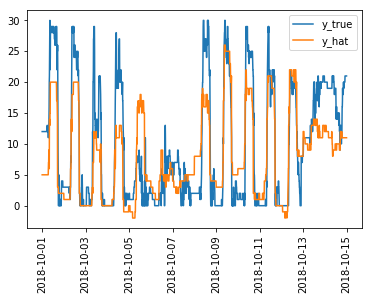

In [25]:
pred_df = pd.read_csv('/Users/jordi/Downloads/split_stations/predictions/212_pred.csv', parse_dates=[0])
plt.plot(pred_df.ts, pred_df.available_bikes, label='y_true')
plt.plot(pred_df.ts, np.round(pred_df.prediction), label='y_hat')
plt.xticks(rotation=90)
plt.legend()

In [29]:
# fix negative prediction values
for pred in error_station_ids:
    pred_df = pd.read_csv(pred, parse_dates=[0])
    pred_df.loc[:, 'prediction'] = np.maximum(0, pred_df.prediction)
    pred_df.to_csv(pred, index=False)